# Anime Recommedation

## Overview

## Business Problem

I am working with a client who is a business that wants to recommend anime to someone who already watches anime.

## Data Source

[My Anime List](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020/discussion?sort=hotness)

## Results

## Importing

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

import random

## Data Read In

In [158]:
#17562 different anime
anime_df = pd.read_csv("data/MyAnimeList/anime.csv")

In [159]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

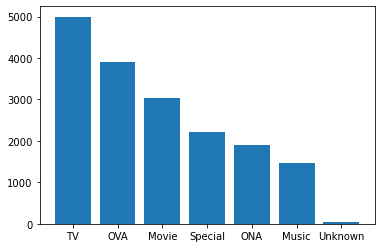

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [160]:
plt.bar(anime_df["Type"].value_counts().index, anime_df["Type"].value_counts())
plt.show()
anime_df["Type"].value_counts()

In [161]:
#Only keep television shows, movies and original net animation (a television show only released on a streaming service)
anime_df = anime_df.loc[anime_df["Type"].isin(["TV", "Movie", "ONA"])]

In [162]:
anime_df["Score"].value_counts()

Unknown    3006
6.52         47
6.45         47
6.6          42
6.3          42
           ... 
4.48          1
3.47          1
8.88          1
4.37          1
4.16          1
Name: Score, Length: 517, dtype: int64

In [163]:
#remove scores of anime that are unknown
anime_df = anime_df.loc[anime_df["Score"] != "Unknown"]

In [164]:
anime_df["Type"].value_counts()

TV       3837
Movie    2017
ONA      1084
Name: Type, dtype: int64

In [165]:
#[anime for anime in anime_df["Genres"] if "Hentai" in anime]
anime_df = anime_df.loc[~anime_df["Genres"].str.contains("Hentai")]

In [166]:
#anime_df = anime_df.loc[anime["Premiered"] != "Unknown"]

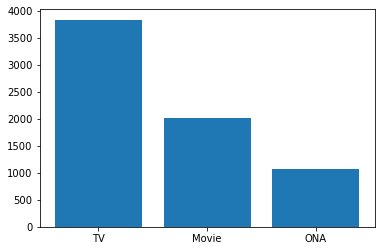

TV       3837
Movie    2011
ONA      1064
Name: Type, dtype: int64

In [167]:
plt.bar(anime_df["Type"].value_counts().index, anime_df["Type"].value_counts())
plt.show()
anime_df["Type"].value_counts()

In [168]:
#new column to split Aired column up to get the anime's airing year
anime_df["Aired_Split"] = [aired.split() for aired in anime_df["Aired"]]
anime_df["Aired_Split"]
started_airing = []
#since the aired column is written in different ways, we must use an if statement to find the corresponding year in the split
for row in anime_df["Aired_Split"]:
    if len(row) == 1:
        started_airing.append(row[0])
    elif len(row) == 2:
        started_airing.append(row[1])
    else:
        if row[2] == "to":
            started_airing.append(row[1])
        elif row[2] == "?":
            started_airing.append(row[0])
        else:
            started_airing.append(row[2])
#new column to track anime's airing year
anime_df["Aired_Year"] = started_airing
#remove two unknown aired years
anime_df = anime_df.loc[anime_df["Aired_Year"] != "Unknown"]
anime_df["Aired_Year"] = anime_df["Aired_Year"].astype(int)

In [169]:
#Removed animes that premiered in the year 2020 as the database is from February 2020
#Anime released would either not be out or not have enough reviews at that point
anime_df = anime_df.loc[anime_df["Aired_Year"] < 2020]
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Split,Aired_Year
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"[Apr, 3,, 1998, to, Apr, 24,, 1999]",1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"[Sep, 1,, 2001]",2001
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"[Apr, 1,, 1998, to, Sep, 30,, 1998]",1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"[Jul, 2,, 2002, to, Dec, 24,, 2002]",2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"[Sep, 30,, 2004, to, Sep, 29,, 2005]",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,42913,Saezuru Doubutsu wa Yarushikanai!,6.45,Comedy,Unknown,囀る動物はやるしかない！,ONA,30,"Dec 19, 2019 to Aug 28, 2020",Unknown,...,25.0,58.0,52.0,31.0,12.0,5.0,3.0,3.0,"[Dec, 19,, 2019, to, Aug, 28,, 2020]",2019
17200,42985,Ling Long: Incarnation Middle Chapter,7.07,"Action, Sci-Fi, Horror, Demons, Drama, Thriller",Ling Cage,灵笼:INCARNATION 中章,ONA,1,"Nov 17, 2019",Unknown,...,33.0,37.0,16.0,6.0,3.0,2.0,1.0,4.0,"[Nov, 17,, 2019]",2019
17313,43779,Eoneu Nal Jameseo Kkaeeoboni Bagelyeoga Doeeo ...,6.58,"Comedy, Romance, Ecchi",Unknown,어느 날 잠에서 깨어보니 베이글녀가 되어 있었다,ONA,15,"Nov 25, 2019 to Dec 2, 2019",Unknown,...,123.0,235.0,174.0,89.0,43.0,17.0,12.0,14.0,"[Nov, 25,, 2019, to, Dec, 2,, 2019]",2019
17319,43878,Miko no Tsutome!,6.46,Comedy,Unknown,みこのつとめっ！,ONA,10,"Dec 7, 2018 to Feb 8, 2019",Unknown,...,15.0,33.0,27.0,29.0,3.0,3.0,2.0,14.0,"[Dec, 7,, 2018, to, Feb, 8,, 2019]",2018


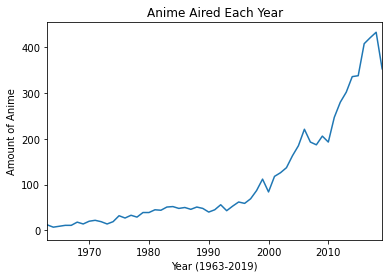

1917      6
1918      1
1924      1
1925      4
1926      5
       ... 
2015    338
2016    408
2017    421
2018    433
2019    353
Name: Aired_Year, Length: 95, dtype: int64

In [170]:
plt.plot(anime_df["Aired_Year"].value_counts().sort_index())
plt.title("Anime Aired Each Year")
plt.xlabel("Year (1963-2019)")
plt.ylabel("Amount of Anime")
plt.xlim(1963, 2019) #1963 being Astro Boy's airing and being regarded as the godfather of anime to come
plt.show()
anime_df["Aired_Year"].value_counts().sort_index()

In [171]:
anime_df["Genres"] = [genre.split(", ") for genre in anime_df["Genres"]]

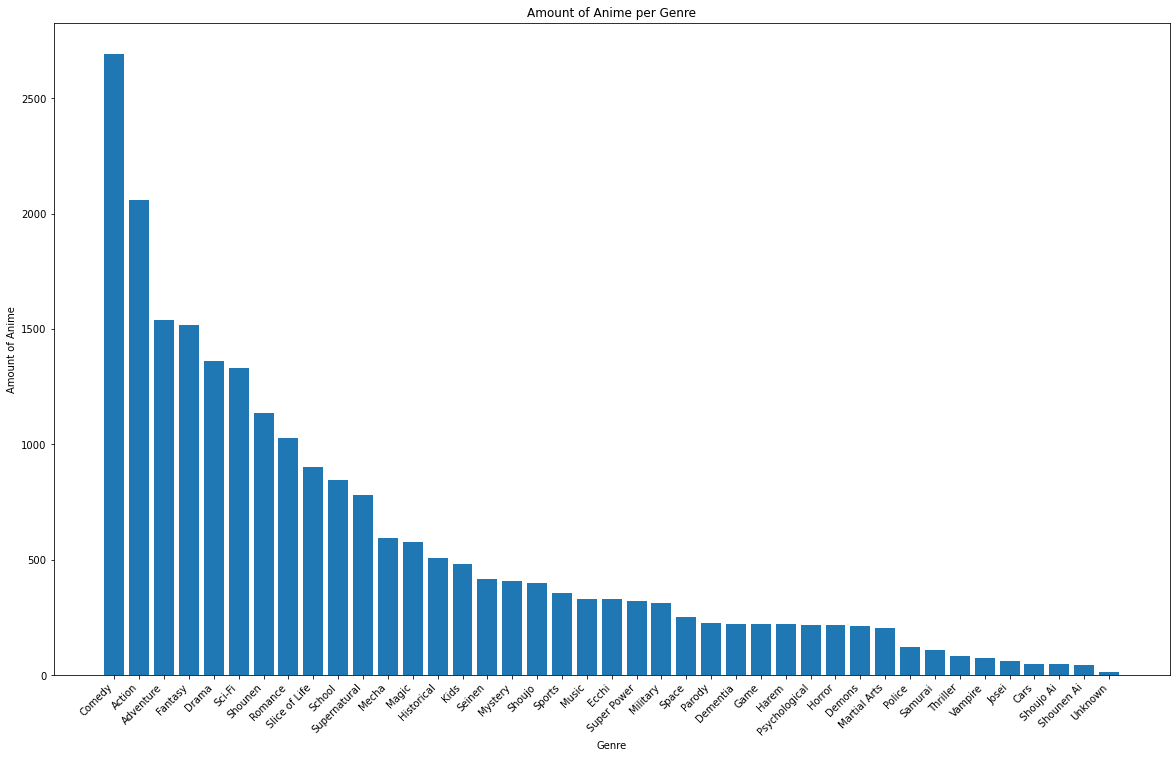

In [172]:
genre_count = {}
for anime in anime_df["Genres"]:
    for genre in anime:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
genre_count
genre_df = pd.DataFrame.from_dict({"Genre":list(genre_count.keys()), "Amount":list(genre_count.values())})
genre_df = genre_df.sort_values("Amount", ascending=False)

plt.figure(figsize=(20,12))
plt.bar(genre_df["Genre"], genre_df["Amount"])
plt.xticks(rotation=45, ha="right")
plt.title("Amount of Anime per Genre")
plt.xlabel("Genre")
plt.ylabel("Amount of Anime")
plt.show()
#decide to drop some later

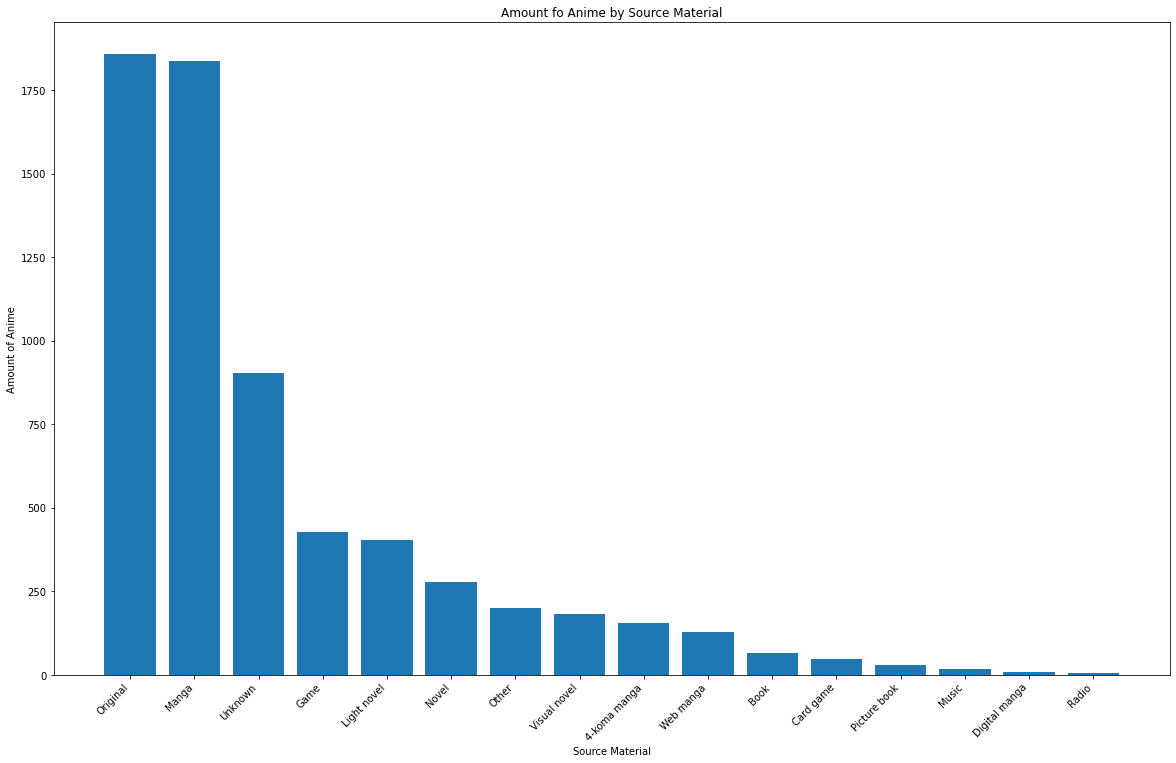

In [173]:
plt.figure(figsize=(20,12))
plt.bar(anime_df["Source"].value_counts().index, anime_df["Source"].value_counts().values)
plt.xticks(rotation=45, ha="right")
plt.title("Amount fo Anime by Source Material")
plt.xlabel("Source Material")
plt.ylabel("Amount of Anime")
plt.show()

In [174]:
anime_df = anime_df.rename(columns={"On-Hold":"On_Hold", "Plan to Watch":"Plan_To_Watch", "English name":"English_Name",
                        "Japanese name":"Japanese_Name"})

In [175]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6546 entries, 0 to 17327
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         6546 non-null   int64 
 1   Name           6546 non-null   object
 2   Score          6546 non-null   object
 3   Genres         6546 non-null   object
 4   English_Name   6546 non-null   object
 5   Japanese_Name  6546 non-null   object
 6   Type           6546 non-null   object
 7   Episodes       6546 non-null   object
 8   Aired          6546 non-null   object
 9   Premiered      6546 non-null   object
 10  Producers      6546 non-null   object
 11  Licensors      6546 non-null   object
 12  Studios        6546 non-null   object
 13  Source         6546 non-null   object
 14  Duration       6546 non-null   object
 15  Rating         6546 non-null   object
 16  Ranked         6546 non-null   object
 17  Popularity     6546 non-null   int64 
 18  Members        6546 non-nul

In [176]:
anime_df["Studios"].value_counts()

Unknown                                  1324
Toei Animation                            447
Sunrise                                   246
Madhouse                                  189
Studio Deen                               158
                                         ... 
Fanworks, Tomovies                          1
Sunrise, Bandai Namco Pictures, XFLAG       1
Studio Hibari, Production Reed              1
Madhouse, Tezuka Productions                1
TNK, Production Reed                        1
Name: Studios, Length: 692, dtype: int64

In [177]:
anime_df["Studios"] = [studios.split(", ") for studios in anime_df["Studios"]]

0                   [Sunrise]
1                     [Bones]
2                  [Madhouse]
3                   [Sunrise]
4            [Toei Animation]
                 ...         
17170             [AQUA ARIS]
17200    [YHKT Entertainment]
17313         [Studio Animal]
17319               [Unknown]
17327               [Unknown]
Name: Studios, Length: 6546, dtype: object

In [207]:
anime_df[["Favorites", "Name"]].sort_values(by="Favorites", ascending=False)


,Favorites,Name
3971,183914,Fullmetal Alchemist: Brotherhood
5683,148452,Steins;Gate
6474,147274,Hunter x Hunter (2011)
1393,145201,Death Note
7449,129844,Shingeki no Kyojin
...,...,...
5089,0,Atelier Petros Joukuu Gekijou: Sentaku Shima n...
5091,0,Chuumon no Ooi Ryouriten
5093,0,Umi no Triton (1979)
11791,0,Kotowaza Gundam-san (ONA)


In [206]:
anime_df[["Members", "Name"]].sort_values(by="Members", ascending=False)

,Members,Name
1393,2589552,Death Note
7449,2531397,Shingeki no Kyojin
3971,2248456,Fullmetal Alchemist: Brotherhood
6614,2214395,Sword Art Online
10451,2123866,One Punch Man
...,...,...
12719,203,Yoshichirou no Keirei
15063,201,Tsukiyo & Opal
16024,196,Fast Week
13247,187,Goichi Jiisan


In [113]:
#read in users and their reviews
ratings_df = pd.read_csv("data/MyAnimeList/animelist.csv")
ratings_df

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1


In [114]:
ratings = ratings_df.rename(columns={"user_id":"User_ID","rating":"Rating","watching_status":"Watching_Status",
                          "watched_episodes":"Watched_Episodes"})

In [115]:
print(109224747 / 353404) #average 
print(ratings_df["user_id"].value_counts().sort_values()) 
#I'm a little hesitant about this data because I would understand someone having 1,000 to even 2,000 entries
#if they have watched ALOT of anime, but anything above that is vastly too much for a normal person to ever watch
#and the biggest number is 16639, which is almost how much anime is in the database
print((ratings_df["user_id"].value_counts().sort_values() > 2000).value_counts()) 

309.0648294869328
83252         1
95819         1
135838        1
261668        1
306893        1
          ...  
131988    17520
147331    17526
281232    17533
140590    17534
20807     17546
Name: user_id, Length: 325770, dtype: int64
False    323311
True       2459
Name: user_id, dtype: int64


In [116]:
#gets a random sample of 20,000 different users
random_users = list(ratings_df["user_id"].drop_duplicates().sample(n=20000, random_state=42).values)
ratings_df = ratings_df.loc[ratings_df["user_id"].isin(random_users)]
ratings_df

#I believe that a rating of 0 means that its not currently rated by the user.
#I might need to decide if I remove them entirely

,user_id,anime_id,rating,watching_status,watched_episodes
213,2,24833,0,1,0
214,2,235,10,1,100
215,2,36721,0,1,1
216,2,40956,0,1,0
217,2,31933,0,1,3
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1


In [127]:
#merges 20,000 users with the filtered anime
df = anime_df.merge(ratings_df, left_on = "MAL_ID", right_on = "anime_id").drop(["anime_id", "Aired_Split"], axis="columns")
df

,MAL_ID,Name,Score,Genres,English_Name,Japanese_Name,Type,Episodes,Aired,Premiered,...,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Year,user_id,rating,watching_status,watched_episodes
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,1998,41,0,2,26
1,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,1998,90,10,1,5
2,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,1998,126,9,2,26
3,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,1998,138,8,4,10
4,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,1998,156,9,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287715,44042,Holo no Graffiti,8.58,[Comedy],Holo Graffiti,ホロのぐらふぃてぃ,ONA,Unknown,"May 5, 2019 to ?",Unknown,...,148.0,49.0,43.0,61.0,478.0,2019,347134,0,6,0
5287716,44042,Holo no Graffiti,8.58,[Comedy],Holo Graffiti,ホロのぐらふぃてぃ,ONA,Unknown,"May 5, 2019 to ?",Unknown,...,148.0,49.0,43.0,61.0,478.0,2019,347462,6,1,95
5287717,44042,Holo no Graffiti,8.58,[Comedy],Holo Graffiti,ホロのぐらふぃてぃ,ONA,Unknown,"May 5, 2019 to ?",Unknown,...,148.0,49.0,43.0,61.0,478.0,2019,347518,0,1,0
5287718,44042,Holo no Graffiti,8.58,[Comedy],Holo Graffiti,ホロのぐらふぃてぃ,ONA,Unknown,"May 5, 2019 to ?",Unknown,...,148.0,49.0,43.0,61.0,478.0,2019,350301,8,1,97


In [118]:
#top reviewed anime
df["Name"].value_counts().head(30)

Death Note                                                  14623
Shingeki no Kyojin                                          13276
Sword Art Online                                            12927
Fullmetal Alchemist: Brotherhood                            12346
Toradora!                                                   11998
Angel Beats!                                                11943
Steins;Gate                                                 11811
Code Geass: Hangyaku no Lelouch                             11802
Naruto                                                      11028
Mirai Nikki                                                 10965
One Punch Man                                               10789
No Game No Life                                             10732
Elfen Lied                                                  10529
Tokyo Ghoul                                                 10504
Clannad                                                     10263
Bakemonoga

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5287720 entries, 0 to 5287719
Data columns (total 41 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   MAL_ID            int64 
 1   Name              object
 2   Score             object
 3   Genres            object
 4   English_Name      object
 5   Japanese_Name     object
 6   Type              object
 7   Episodes          object
 8   Aired             object
 9   Premiered         object
 10  Producers         object
 11  Licensors         object
 12  Studios           object
 13  Source            object
 14  Duration          object
 15  Rating            object
 16  Ranked            object
 17  Popularity        int64 
 18  Members           int64 
 19  Favorites         int64 
 20  Watching          int64 
 21  Completed         int64 
 22  On_Hold           int64 
 23  Dropped           int64 
 24  Plan_To_Watch     int64 
 25  Score-10          object
 26  Score-9           object
 27  Score-8     

In [120]:
print((df["user_id"].value_counts().sort_values() > 1000).value_counts())
print((df["user_id"].value_counts().sort_values() > 2000).value_counts())
print(df["user_id"].value_counts().sort_values()) 

False    19483
True       428
Name: user_id, dtype: int64
False    19870
True        41
Name: user_id, dtype: int64
234765       1
293504       1
228417       1
268788       1
90885        1
          ... 
44215     4437
82327     5202
130106    5535
50485     6524
269633    6525
Name: user_id, Length: 19911, dtype: int64


## Appendix

In [121]:
#Looked into merging in all anime synopsis but it did not seem like it would end up being useful in recommending
#as the synopsises don't really share common words
#synopsis = pd.read_csv("data/MyAnimeList/anime_with_synopsis.csv")
#synopsis = synopsis.rename(columns={"sypnopsis" : "Synopsis"})
#synopsis = synopsis[["MAL_ID", "Synopsis"]]
#anime = anime.merge(synopsis, how = "left", left_on = "MAL_ID", right_on = "MAL_ID")

In [122]:
df.loc[df["Name"] == "Naruto"]["MAL_ID"].value_counts()

20    11028
Name: MAL_ID, dtype: int64

In [123]:
df.loc[df["Name"] == "Gintama"]["MAL_ID"].value_counts()

918    7265
Name: MAL_ID, dtype: int64

In [124]:
df.loc[df["Name"] == "Cowboy Bebop"]["MAL_ID"].value_counts()

1    8839
Name: MAL_ID, dtype: int64

In [125]:
df.loc[df["Name"] == "One Piece"]["MAL_ID"].value_counts()

21    8073
Name: MAL_ID, dtype: int64